Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


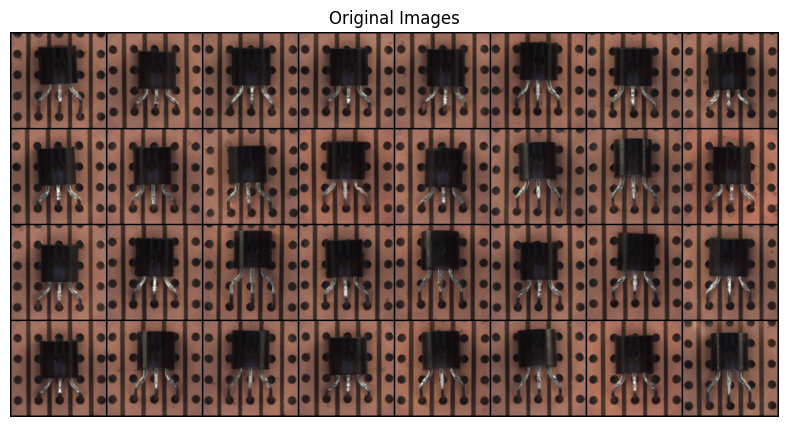

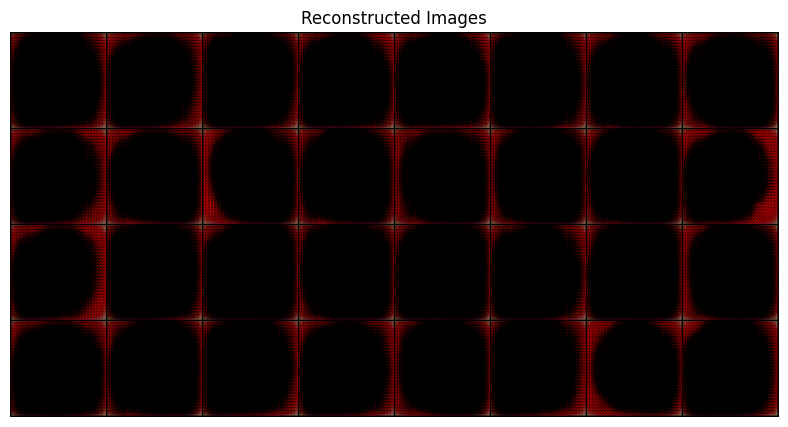

In [12]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from data_loader import get_train_loader  

model_path = './model_files/AE.pt' 
model = torch.jit.load(model_path)
model.eval()


def inverse_normalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    tensor = tensor * std + mean
    return tensor

def logit_transform(tensor, eps=1e-6):
    tensor = tensor.clamp(min=eps, max=1-eps)  # 값의 범위를 0과 1 사이로 제한
    return torch.log(tensor / (1 - tensor))


data_loader = get_train_loader('./datas/train.csv', batch_size=32)

images, _ = next(iter(data_loader))
reconstructed = model(images)


images_inv = inverse_normalize(images.clone().detach())
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Original Images')
ax.imshow(make_grid(images_inv, nrow=8).permute(1, 2, 0))
ax.axis('off')


reconstructed_logit = logit_transform(reconstructed.clone().detach())
reconstructed_inv_logit = inverse_normalize(reconstructed_logit)
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Reconstructed Images')
ax.imshow(make_grid(reconstructed_inv_logit, nrow=8).permute(1, 2, 0))
ax.axis('off')

plt.show()